# Import library

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read (.json) file from google drive


In [13]:
from google.colab import drive 
drive.mount('/content/gdrive')

df_covid_worldwide = pd.read_json('gdrive/My Drive/covid19_worldwide_2020.json')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Size of the dataset and the contents of the dataset 

In [14]:
print("Dataset size: %d columns dan %d rows.\n" % df_covid_worldwide.shape)
print(df_covid_worldwide.head(20))

Dataset size: 61900 columns dan 6 rows.

         date  daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
0  2020-03-20                      1             0                1       0   
1  2020-03-21                      0             0                1       0   
2  2020-03-22                      1             0                2       0   
3  2020-03-23                      0             0                2       0   
4  2020-03-24                      0             0                2       0   
5  2020-03-25                      1             0                3       0   
6  2020-03-26                      0             0                3       0   
7  2020-03-27                      2             0                5       0   
8  2020-03-28                      0             0                5       0   
9  2020-03-29                      0             0                5       0   
10 2020-03-30                      0             0                5       0   
11 2020-03-

# Set index on date column

In [15]:
print("Initial information:")
df_covid_worldwide.info()

df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("\nAfter setting index on date column:")
df_covid_worldwide.info()

Initial information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB

After setting index on date column:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  int64 
 1   daily_deat

# Check for missing value

In [16]:
print("Missing value: ", df_covid_worldwide.isna().sum())

df_covid_worldwide.dropna(inplace=True) # drop missing value
print("Missing value after drop: ", df_covid_worldwide.isna().sum())

Missing value:  daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64
Missing value after drop:  daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


# Import country_details dataset 
because in the previous step we drop several geo_id rows contain missing value

In [18]:
from google.colab import drive 
drive.mount('/content/gdrive')

df_countries = pd.read_json('gdrive/My Drive/country_details.json')
print(df_countries.head(10))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
  geo_id country_name
0     TD         Chad
1     CU         Cuba
2     FJ         Fiji
3     GU         Guam
4     IR         Iran
5     IQ         Iraq
6     LA         Laos
7     ML         Mali
8     OM         Oman
9     PE         Peru


# Merging covid19_worldwide_2020.json and country_details.json
Mapping covid-19 data and country data. Use pandas's .merge function to merge df_covid_worldwide and df_countries.

To merge, use the geo_id column, (df_covid_worldwide has an index in the date column, so we need to .reset_index()). After the merge, the index can be set back to the date column.

In [21]:
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
print(df_covid_denormalized.head(10))

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   
2020-01-05                      0             0                0       0   
2020-01-06                      0             0                0       0   
2020-01-07                      0             0                0       0   
2020-01-08                      0             0                0       0   
2020-01-09                      0             0                0       0   

           geo_id country_name  
date                            
2019-12-31     IN    

# Find the first cases of covid-19 in various countries.

In [59]:
unique_country = df_covid_denormalized["country_name"].unique()
for all_country in unique_country:
    country = df_covid_denormalized[df_covid_denormalized["country_name"]==all_country]
    first_case = country[country["confirmed_cases"]>0][["confirmed_cases","country_name"]]
    print(first_case.head(1))

            confirmed_cases country_name
date                                    
2020-01-30                1        India
            confirmed_cases country_name
date                                    
2020-02-20                2         Iran
            confirmed_cases country_name
date                                    
2020-02-27                2     Pakistan
            confirmed_cases country_name
date                                    
2020-03-01                1      Armenia
            confirmed_cases country_name
date                                    
2019-12-31               27        China
            confirmed_cases country_name
date                                    
2020-02-29                1   Azerbaijan
            confirmed_cases country_name
date                                    
2020-02-26                1      Algeria
            confirmed_cases country_name
date                                    
2020-03-01                1   Luxembourg
            conf

# Fatality Ratio
Added one additional column, namely fatality rate, which is the division between the deaths and confirmed_cases columns.

In [23]:
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"] / df_covid_denormalized["confirmed_cases"]
print(df_covid_denormalized.head(100))

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   
...                           ...           ...              ...     ...   
2020-04-05                    472             9             3374      77   
2020-04-06                    693            32             4067     109   
2020-04-07                    354             5             4421     114   
2020-04-08                    773            35             5194     149   
2020-04-09                    540            17             5734     166   

           

# Top county with the highest fatality rate


In [29]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-03-15     SD        Sudan             1.0
2020-02-20     IR         Iran             1.0
2020-03-16     GT    Guatemala             1.0
2020-03-13     GY       Guyana             1.0
2020-03-18     SD        Sudan             1.0
2020-03-17     SD        Sudan             1.0
2020-03-16     SD        Sudan             1.0
2020-02-03     PH  Philippines             0.5
2020-02-05     PH  Philippines             0.5
2020-02-04     PH  Philippines             0.5
2020-03-28     NI    Nicaragua             0.5
2020-02-02     PH  Philippines             0.5
2020-03-24     ZW     Zimbabwe             0.5
2020-03-24     GM       Gambia             0.5
2020-03-19     SD        Sudan             0.5
2020-03-20     SD        Sudan             0.5
2020-03-21     SD        Sudan             0.5
2020-03-22     SD        Sudan             0.5
2020-03-23     SD        Sudan             0.5
2020-03-24   

# The condition of the highest fatality ratio in August 2020

In [45]:
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]
df_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False)
print(df_fatality_rate_on_august["fatality_ratio"].head(20)) 

country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64


# Visualize top 20 country with the highest fatality rate on August

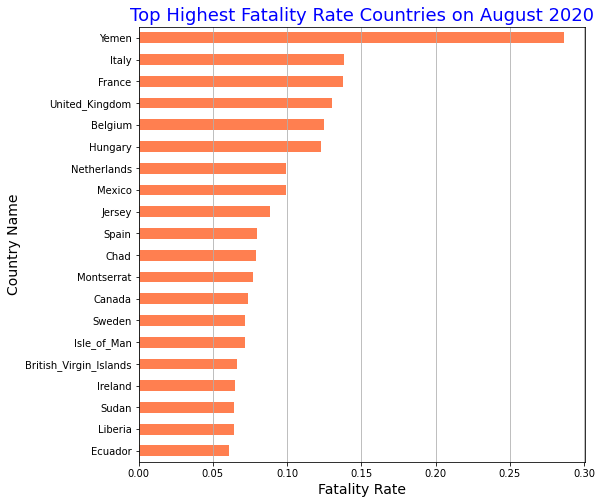

In [44]:
plt.figure(figsize=(8,8))
df_fatality_rate_on_august["fatality_ratio"].head(20).sort_values().plot(kind="barh", color="coral")
plt.title("Top Highest Fatality Rate Countries on August 2020", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.show()

&#169; Wildan Hanif Musyaffa